# Business Understanding
There is a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

1) If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

2) If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

# Business Objectives¶
The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. The company can utilise this knowledge for its portfolio and risk assessment.

# Aim
Our aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

# Data Understanding
 
"loan.csv" : Contains data for all loans issued through the time period 2007 t0 2011.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Pandas options
pd.set_option('display.max_colwidth', 1000, 'display.max_rows', None, 'display.max_columns', None)

In [2]:
#read loan.csv file
loan = pd.read_csv("loan.csv", encoding = "ISO-8859-1")

FileNotFoundError: [Errno 2] No such file or directory: 'loan.csv'

In [ ]:
loan.head()

### Target Variable :loan_status
<p1>Since our aim is to find factors that helps to identify charge-off on a loan.We set loan_status as out target variable.</p1>

In [ ]:
#target Variable
loan["loan_status"].value_counts()

In [ ]:
loan.shape

### Data Handling and Cleaning


<h4>Approach:</h4>
<p>1.Keep rows corresponsing to charge-off and fully paid .We cannot determine if those with loan status as current will pay the load fully or fail to pay in future.</p>
<p>2.Drop all customer behaviour variables which come into picture after the loan is being approved eg-funded_amnt,installment,
pymnt_plan,out_prncp etc</p>

<h4>data cleaning : handling null values column wise</h4>

In [6]:
# take subset of data corresponsing to loan status as charge off and fully paid
loan = loan[(loan['loan_status'] == 'Charged Off') | (loan['loan_status'] == 'Fully Paid')]

In [7]:
#Reduced no of rows from 39717 to 38577
loan.shape

(38577, 111)

In [8]:
#column wise null values
missing_fractions = loan.isnull().mean()
print(missing_fractions)

id                                0.000000
member_id                         0.000000
loan_amnt                         0.000000
funded_amnt                       0.000000
funded_amnt_inv                   0.000000
term                              0.000000
int_rate                          0.000000
installment                       0.000000
grade                             0.000000
sub_grade                         0.000000
emp_title                         0.061850
emp_length                        0.026778
home_ownership                    0.000000
annual_inc                        0.000000
verification_status               0.000000
issue_d                           0.000000
loan_status                       0.000000
pymnt_plan                        0.000000
url                               0.000000
desc                              0.324727
purpose                           0.000000
title                             0.000285
zip_code                          0.000000
addr_state 

In [9]:
# List of columns having greater than 30% null values
drop_list = list(missing_fractions[missing_fractions>0.3].index)
print(drop_list)

['desc', 'mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot

In [10]:
# There are 58 columns having greater than 30% null values
len(drop_list)

58

In [11]:
#drop columns with more than 30% missing values
loan.drop(drop_list, inplace=True, axis=1)

In [12]:
#after dropping cols with 30% missing values
loan.shape

(38577, 53)

In [13]:
#column wise null values
loan.isnull().sum()

id                               0
member_id                        0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_title                     2386
emp_length                    1033
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
loan_status                      0
pymnt_plan                       0
url                              0
purpose                          0
title                           11
zip_code                         0
addr_state                       0
dti                              0
delinq_2yrs                      0
earliest_cr_line                 0
inq_last_6mths                   0
open_acc                         0
pub_rec             

In [14]:
#list of parameters to consider for analysis
keep_list = ["loan_amnt","term","int_rate","grade","sub_grade","emp_title","emp_length","home_ownership","annual_inc","verification_status","issue_d","loan_status","purpose","title","zip_code","addr_state","dti","delinq_2yrs","earliest_cr_line","inq_last_6mths","open_acc","pub_rec","revol_bal","revol_util","total_acc","collections_12_mths_ex_med","policy_code","application_type","acc_now_delinq","pub_rec_bankruptcies","tax_liens"]

In [15]:
len(keep_list)

31

In [16]:
sorted(keep_list)

['acc_now_delinq',
 'addr_state',
 'annual_inc',
 'application_type',
 'collections_12_mths_ex_med',
 'delinq_2yrs',
 'dti',
 'earliest_cr_line',
 'emp_length',
 'emp_title',
 'grade',
 'home_ownership',
 'inq_last_6mths',
 'int_rate',
 'issue_d',
 'loan_amnt',
 'loan_status',
 'open_acc',
 'policy_code',
 'pub_rec',
 'pub_rec_bankruptcies',
 'purpose',
 'revol_bal',
 'revol_util',
 'sub_grade',
 'tax_liens',
 'term',
 'title',
 'total_acc',
 'verification_status',
 'zip_code']

In [17]:
#list of post loan approval parameters
drop_list_2 = [x for x in loan.columns if x not in keep_list ]
print(drop_list_2)

['id', 'member_id', 'funded_amnt', 'funded_amnt_inv', 'installment', 'pymnt_plan', 'url', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'chargeoff_within_12_mths', 'delinq_amnt']


In [18]:
#delete post loan approval parameters
loan.drop(drop_list_2,inplace=True,axis=1)

In [19]:
loan.shape

(38577, 31)

In [20]:
loan.isnull().sum()

loan_amnt                        0
term                             0
int_rate                         0
grade                            0
sub_grade                        0
emp_title                     2386
emp_length                    1033
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
loan_status                      0
purpose                          0
title                           11
zip_code                         0
addr_state                       0
dti                              0
delinq_2yrs                      0
earliest_cr_line                 0
inq_last_6mths                   0
open_acc                         0
pub_rec                          0
revol_bal                        0
revol_util                      50
total_acc                        0
collections_12_mths_ex_med      56
policy_code                      0
application_type                 0
acc_now_delinq      

In [21]:
#delete irrelevant cols
loan["emp_title"].value_counts()
#large number of distinct values,wont be useful for analysis
loan.drop(['emp_title'],inplace=True,axis=1)

In [22]:
loan.shape

(38577, 30)

In [23]:
loan['title'].value_counts()
#large number of distinct values,wont be useful for analysis
loan.drop(['title'],inplace=True,axis=1)

In [24]:
loan.shape

(38577, 29)

In [25]:
loan['collections_12_mths_ex_med'].value_counts(dropna=False)
#since there are no distinct values present in the column ,we will drop it
loan.drop(['collections_12_mths_ex_med'],inplace=True,axis=1)

In [26]:
loan.shape

(38577, 28)

In [27]:
loan['tax_liens'].value_counts(dropna=False)
#drop column as no distinct values present
loan.drop(['tax_liens'],inplace=True,axis=1)

In [28]:
loan.shape

(38577, 27)

In [29]:
loan.sample(10)

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,policy_code,application_type,acc_now_delinq,pub_rec_bankruptcies
38306,6500,36 months,11.78%,C,C1,10+ years,MORTGAGE,91200.0,Not Verified,Nov-08,Charged Off,home_improvement,920xx,CA,2.14,0,Sep-96,2,4,0,4541,96.60%,11,1,INDIVIDUAL,0,0.0
28889,24250,36 months,17.56%,E,E4,10+ years,RENT,68400.0,Verified,Jun-10,Fully Paid,debt_consolidation,765xx,TX,22.51,1,Sep-92,1,21,0,51287,62.30%,31,1,INDIVIDUAL,0,0.0
30282,20000,36 months,12.73%,C,C1,6 years,RENT,132000.0,Verified,May-10,Fully Paid,credit_card,333xx,FL,12.41,0,Oct-98,0,6,0,43124,92.40%,39,1,INDIVIDUAL,0,0.0
8107,6000,36 months,10.99%,B,B3,4 years,MORTGAGE,33600.0,Not Verified,Sep-11,Fully Paid,debt_consolidation,956xx,CA,6.21,0,Jan-96,2,8,0,5765,42.10%,24,1,INDIVIDUAL,0,0.0
33313,16000,36 months,14.61%,D,D1,< 1 year,MORTGAGE,135000.0,Not Verified,Jan-10,Fully Paid,small_business,980xx,WA,20.74,0,Sep-98,0,12,0,81023,61.70%,24,1,INDIVIDUAL,0,0.0
21664,2500,36 months,6.91%,A,A5,< 1 year,RENT,46000.0,Not Verified,Dec-10,Fully Paid,credit_card,200xx,DC,7.28,0,Dec-05,1,12,0,4914,23.60%,13,1,INDIVIDUAL,0,0.0
22940,8000,36 months,6.17%,A,A3,8 years,OWN,75000.0,Source Verified,Nov-10,Fully Paid,home_improvement,210xx,MD,16.75,0,Jan-04,3,11,0,0,0%,17,1,INDIVIDUAL,0,0.0
13422,19700,60 months,16.59%,D,D1,10+ years,MORTGAGE,65000.0,Verified,Jun-11,Fully Paid,debt_consolidation,774xx,TX,29.13,0,Apr-86,3,18,0,23018,44.90%,43,1,INDIVIDUAL,0,0.0
20583,9250,60 months,16.40%,E,E1,10+ years,MORTGAGE,36000.0,Source Verified,Jan-11,Fully Paid,debt_consolidation,286xx,NC,22.30,0,May-98,0,17,0,8628,34.20%,22,1,INDIVIDUAL,0,0.0
26485,6000,60 months,11.12%,B,B3,10+ years,MORTGAGE,56550.0,Not Verified,Aug-10,Fully Paid,other,850xx,AZ,19.61,0,Jul-93,2,7,0,44588,82%,20,1,INDIVIDUAL,0,0.0


In [30]:
#inspecting above sample
loan['policy_code'].value_counts()
#no distinct values in column policy_code

1    38577
Name: policy_code, dtype: int64

In [31]:
#inspecting above sample
loan['application_type'].value_counts()
#no distinct values in column application_type

INDIVIDUAL    38577
Name: application_type, dtype: int64

In [32]:
#inspecting above sample
loan['acc_now_delinq'].value_counts()
#no distinct values in column acc_now_delinq

0    38577
Name: acc_now_delinq, dtype: int64

In [33]:
#dropping cols with no distinct values
loan.drop(['policy_code','application_type','acc_now_delinq'],inplace=True,axis=1)

In [34]:
loan.shape

(38577, 24)

In [35]:
loan['zip_code'].value_counts()
#drop column since data has missing information
loan.drop(['zip_code'],inplace=True,axis=1)

In [36]:
loan.shape

(38577, 23)

<h4>data cleaning : handling null values row wise</h4>

In [37]:
loan.isnull().sum()

loan_amnt                  0
term                       0
int_rate                   0
grade                      0
sub_grade                  0
emp_length              1033
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                50
total_acc                  0
pub_rec_bankruptcies     697
dtype: int64

In [38]:
#dropping null rows for emp_length column
loan = loan[~loan['emp_length'].isnull()]

In [39]:
loan.shape

(37544, 23)

In [40]:
loan.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
grade                     0
sub_grade                 0
emp_length                0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
addr_state                0
dti                       0
delinq_2yrs               0
earliest_cr_line          0
inq_last_6mths            0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util               47
total_acc                 0
pub_rec_bankruptcies    697
dtype: int64

In [41]:
#dropping null rows for revol_util column
loan = loan[~loan['revol_util'].isnull()]

In [42]:
loan.shape

(37497, 23)

In [43]:
loan.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
grade                     0
sub_grade                 0
emp_length                0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
addr_state                0
dti                       0
delinq_2yrs               0
earliest_cr_line          0
inq_last_6mths            0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util                0
total_acc                 0
pub_rec_bankruptcies    697
dtype: int64

In [44]:
#dropping null rows for pub_rec_bankruptcies column
loan = loan[~loan['pub_rec_bankruptcies'].isnull()]

In [45]:
loan.shape

(36800, 23)

In [46]:
loan.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
addr_state              0
dti                     0
delinq_2yrs             0
earliest_cr_line        0
inq_last_6mths          0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
pub_rec_bankruptcies    0
dtype: int64

***completed data cleaning***

### Correcting datatypes

In [47]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36800 entries, 0 to 39680
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             36800 non-null  int64  
 1   term                  36800 non-null  object 
 2   int_rate              36800 non-null  object 
 3   grade                 36800 non-null  object 
 4   sub_grade             36800 non-null  object 
 5   emp_length            36800 non-null  object 
 6   home_ownership        36800 non-null  object 
 7   annual_inc            36800 non-null  float64
 8   verification_status   36800 non-null  object 
 9   issue_d               36800 non-null  object 
 10  loan_status           36800 non-null  object 
 11  purpose               36800 non-null  object 
 12  addr_state            36800 non-null  object 
 13  dti                   36800 non-null  float64
 14  delinq_2yrs           36800 non-null  int64  
 15  earliest_cr_line   

In [48]:
#converting term to int type
loan['term']=loan['term'].apply(lambda x:int(x[0:-7]))

In [49]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36800 entries, 0 to 39680
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             36800 non-null  int64  
 1   term                  36800 non-null  int64  
 2   int_rate              36800 non-null  object 
 3   grade                 36800 non-null  object 
 4   sub_grade             36800 non-null  object 
 5   emp_length            36800 non-null  object 
 6   home_ownership        36800 non-null  object 
 7   annual_inc            36800 non-null  float64
 8   verification_status   36800 non-null  object 
 9   issue_d               36800 non-null  object 
 10  loan_status           36800 non-null  object 
 11  purpose               36800 non-null  object 
 12  addr_state            36800 non-null  object 
 13  dti                   36800 non-null  float64
 14  delinq_2yrs           36800 non-null  int64  
 15  earliest_cr_line   

In [50]:
#converting int_rate to int type in percentage
loan['int_rate']=loan['int_rate'].apply(lambda x:float(x[0:-1]))

In [51]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36800 entries, 0 to 39680
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             36800 non-null  int64  
 1   term                  36800 non-null  int64  
 2   int_rate              36800 non-null  float64
 3   grade                 36800 non-null  object 
 4   sub_grade             36800 non-null  object 
 5   emp_length            36800 non-null  object 
 6   home_ownership        36800 non-null  object 
 7   annual_inc            36800 non-null  float64
 8   verification_status   36800 non-null  object 
 9   issue_d               36800 non-null  object 
 10  loan_status           36800 non-null  object 
 11  purpose               36800 non-null  object 
 12  addr_state            36800 non-null  object 
 13  dti                   36800 non-null  float64
 14  delinq_2yrs           36800 non-null  int64  
 15  earliest_cr_line   

In [52]:
#converting emp_length to int type
loan['emp_length']=loan['emp_length'].apply(lambda x:int(x[0:-5].replace('+','').replace('<','').strip()))

In [53]:
#converting revol_util to int type
loan['revol_util']=loan['revol_util'].apply(lambda x:float(x[0:-1]))

In [54]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36800 entries, 0 to 39680
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             36800 non-null  int64  
 1   term                  36800 non-null  int64  
 2   int_rate              36800 non-null  float64
 3   grade                 36800 non-null  object 
 4   sub_grade             36800 non-null  object 
 5   emp_length            36800 non-null  int64  
 6   home_ownership        36800 non-null  object 
 7   annual_inc            36800 non-null  float64
 8   verification_status   36800 non-null  object 
 9   issue_d               36800 non-null  object 
 10  loan_status           36800 non-null  object 
 11  purpose               36800 non-null  object 
 12  addr_state            36800 non-null  object 
 13  dti                   36800 non-null  float64
 14  delinq_2yrs           36800 non-null  int64  
 15  earliest_cr_line   

In [55]:
#create a new column 'target_variable' by assign 0 and 1 values to loan_status column ,where 1 implies 'Charged Off' and 0 implies 'Fully Paid'
loan['target_variable'] = loan['loan_status'].apply(lambda x:1 if x=='Charged Off' else 0)

***completed correcting incorrect datatypes***

## Derived Metrics

In [56]:
#deriving month and year from earliest_cr_line
loan["earliest_cr_line"]=pd.to_datetime(loan["earliest_cr_line"], format='%b-%y')#https://datatofish.com/strings-to-datetime-pandas/

loan["earliest_cr_line_month"]=loan["earliest_cr_line"].dt.month
loan["earliest_cr_line_year"]=loan["earliest_cr_line"].dt.year

In [57]:
#correct incorrect dates geater than 2011 ,since loan data is available for the duration of 2007-2011 
loan["earliest_cr_line_year"]=loan["earliest_cr_line_year"].apply(lambda x:x-100 if x>2011 else x)

In [58]:
#deriving month and year from issue_d
loan["issue_d"]=pd.to_datetime(loan["issue_d"], format='%b-%y')
loan["issue_d_month"]=loan["issue_d"].dt.month
loan["issue_d_year"]=loan["issue_d"].dt.year

In [59]:
loan.shape

(36800, 28)

In [60]:
loan.head()

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,target_variable,earliest_cr_line_month,earliest_cr_line_year,issue_d_month,issue_d_year
0,5000,36,10.65,B,B2,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,0,1985-01-01,1,3,0,13648,83.7,9,0.0,0,1,1985,12,2011
1,2500,60,15.27,C,C4,1,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,GA,1.00,0,1999-04-01,5,3,0,1687,9.4,4,0.0,1,4,1999,12,2011
2,2400,36,15.96,C,C5,10,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,0,2001-11-01,2,2,0,2956,98.5,10,0.0,0,11,2001,12,2011
3,10000,36,13.49,C,C1,10,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,0,1996-02-01,1,10,0,5598,21.0,37,0.0,0,2,1996,12,2011
5,5000,36,7.90,A,A4,3,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,AZ,11.20,0,2004-11-01,3,9,0,7963,28.3,12,0.0,0,11,2004,12,2011


<h2>Univariate Analysis</h2>

In [61]:
total_charge_off = len(loan[loan['loan_status'] == 'Charged Off'])

In [62]:
total_fully_paid = len(loan[loan['loan_status'] == 'Fully Paid'])

<h3>Plot rate of charge-off against each variable</h3>

In [63]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36800 entries, 0 to 39680
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   loan_amnt               36800 non-null  int64         
 1   term                    36800 non-null  int64         
 2   int_rate                36800 non-null  float64       
 3   grade                   36800 non-null  object        
 4   sub_grade               36800 non-null  object        
 5   emp_length              36800 non-null  int64         
 6   home_ownership          36800 non-null  object        
 7   annual_inc              36800 non-null  float64       
 8   verification_status     36800 non-null  object        
 9   issue_d                 36800 non-null  datetime64[ns]
 10  loan_status             36800 non-null  object        
 11  purpose                 36800 non-null  object        
 12  addr_state              36800 non-null  object

In [64]:
def get_default_rate_plot(col_name,full_name,continuous):
    '''
        plot rate of charge-off against given variable
        -col_name is the column name
        -full_name is the full variable name
        -continuous is true for continuous variable and false for categorical variable
    '''
    if continuous:
        #generate bins for continuous variable
        col_name_buckets = col_name+'_buckets'
        loan[col_name_buckets] = pd.qcut(loan[col_name],[0, .20, .40, .60, .80 ,1],['VL','L','M','H','VH'])
        sns.barplot(x=col_name_buckets,y='target_variable',data=loan)
        plt.ylabel('Charge-off Rate')
        plt.xlabel(full_name)
    else:
        sns.barplot(x=col_name,y='target_variable',data=loan,order=loan.groupby([col_name])['target_variable'].value_counts(normalize=True)[:,1].sort_values(ascending=False).keys()[0:15])
        #sns.barplot(x=col_name,y='target_variable',data=loan)
        plt.ylabel('Charge-off Rate')
        plt.xlabel(full_name)
        plt.xticks(rotation=90)

In [65]:
#create dictionary to store all univariate analysis observations
observations = {}

<h5>1.for Loan Amount</h5>

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

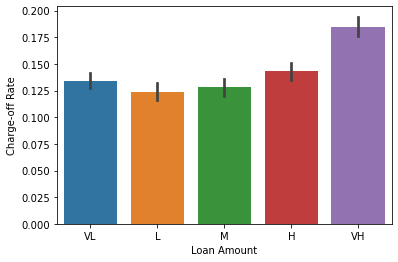

In [66]:
get_default_rate_plot('loan_amnt','Loan Amount',True)
observations['loan_amnt']='Charge-off rate is highest for very high loan amount and there is gradual increase in charge-off rate from low,medium,high and very high loan amount'

<h5>Observation</h5>
<p>Charge-off rate is highest for very high loan amount and there is gradual increase in charge-off rate from low,medium,high and very high loan amount.</p>

<h5>2.for Term</h5>

The number of payments on the loan. Values are in months and can be either 36 or 60.

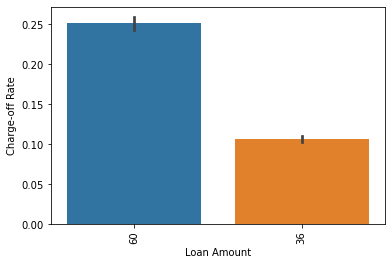

In [67]:
get_default_rate_plot('term','Loan Amount',False)
observations['term']='Charge-off rate is double in case of loans with higher term period of 60 months in comparison with 36 months.'

<h5>Observation</h5>
<p>Charge-off rate is double in case of loans with higher term period of 60 months in comparison with 36 months.</p>

<h5>3.for Interest Rate</h5>


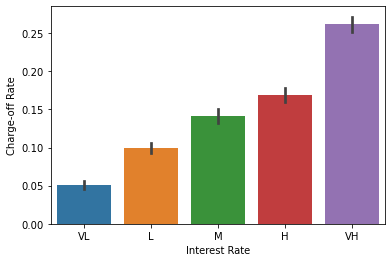

In [68]:
get_default_rate_plot('int_rate','Interest Rate',True)
observations['int_rate']='Charge-off rate  increases as the rate of interest increases.People with very high interest rate default more.'

<h5>Observation</h5>
<p>Charge-off rate increases as the rate of interest increases.People with very high interest rate default more.</p>

<h5>4.for Grade</h5>


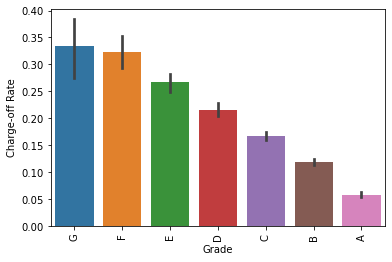

In [69]:
get_default_rate_plot('grade','Grade',False)
observations['grade']='Charge-off rate increases as grade degrades towards a lower value.'

<h5>Observation</h5>
<p>Charge-off rate increases as grade degrades towards a lower value.</p>

<h5>5.for Employment Length</h5>


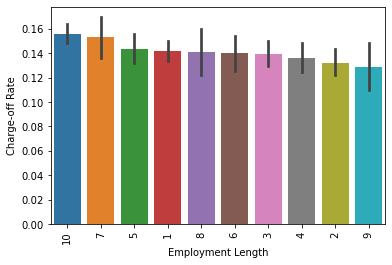

In [70]:
get_default_rate_plot('emp_length','Employment Length',False)
observations['emp_length']='Charge-off rate is in the range of 13%-15% for different employment groups.The variation in charge-off rate is very insignificant.'

<h5>Observation</h5>
<p>Charge-off rate is in the range of 13%-15% for different employment groups.The variation in charge-off rate is  very insignificant.</p>

<h5>6.for Home Ownership</h5>


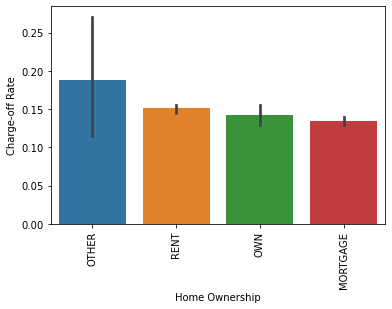

In [71]:
get_default_rate_plot('home_ownership','Home Ownership',False)
observations['home_ownership']='Peope with home-ownenship of type mortagage,own,rent have similar default rate.'

<h5>Observation</h5>
<p>Peope with home-ownenship of type mortagage,own,rent have similar default rate.</p>

<h5>7.for Annual Income</h5>


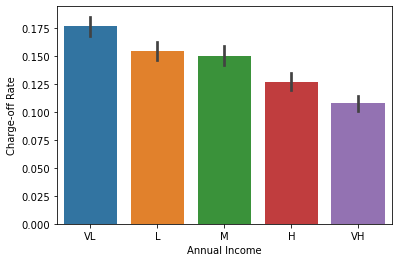

In [72]:
get_default_rate_plot('annual_inc','Annual Income',True)
observations['annual_inc']='Charge-off rate is highest is highest among very low income people and gradually decreases with increase in income.'

<h5>Observation</h5>
<p>Charge-off rate is highest is highest among very low income people and gradually decreases with increase in income.</p>

<h5>8.for Verification Status</h5>


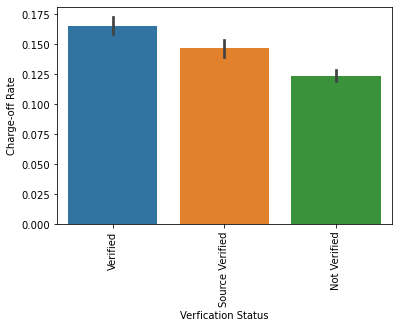

In [73]:
get_default_rate_plot('verification_status','Verfication Status',False)
observations['verification_status']='People with income verified by LC suprisingly tend to default the most.'

<h5>Observation</h5>
<p>People with income verified by LC suprisingly tend to default the most.</p>

<h5>9.for Purpose</h5>


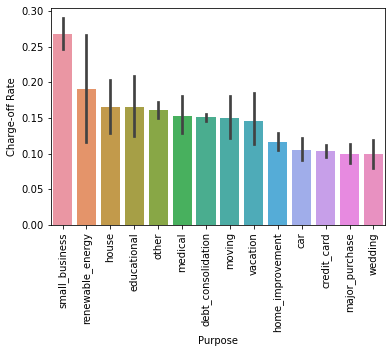

In [74]:
get_default_rate_plot('purpose','Purpose',False)
observations['purpose']='Charge-off rate is high amoung people taking loans for small_business,renewable_energy,house,education'

<h5>Observation</h5>
<p>Charge-off rate is high among people taking loans for small_business,renewable_energy,house,education</p>

<h5>10.for Address State</h5>


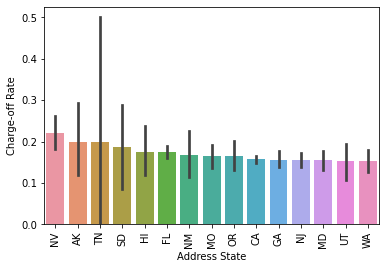

In [75]:
get_default_rate_plot('addr_state','Address State',False)
observations['addr_state']="States live 'Nevada','Alaska','Tennessee','South Dakota' have higher default rates.but the variation in default rate among states is insignificat."

<h5>Observation</h5>
<p>States live 'Nevada','Alaska','Tennessee','South Dakota' have higher default rates,but the variation in default rate among states is insignificat.</p>

<h5>11.for DTI</h5>


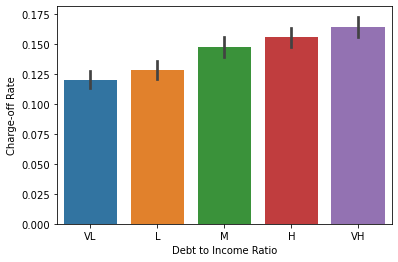

In [76]:
get_default_rate_plot('dti','Debt to Income Ratio',True)
observations['dti']='We can clearly see that higher DTI ratio leads to higher default rates.'

<h5>Observation</h5>
<p>We can clearly see that higher DTI ratio leads to higher default rates.</p>

<h5>12.for delinq_2yrs</h5>


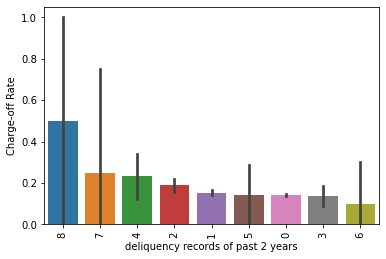

In [77]:
get_default_rate_plot('delinq_2yrs','deliquency records of past 2 years',False)
observations['delinq_2yrs']='We observe that deliquency count aboveor equal to the threshold value of 7 has high risk of doing a default.There is very insignificant difference in default rate for deliquency counts between 0-6'

<h5>Observation</h5>
<p>We observe that deliquency count aboveor equal to the threshold value of 7 has high risk of doing a default.There is very insignificant difference in default rate for deliquency counts between 0-6</p>

<h5>13.for Inquiries in last 6mths</h5>


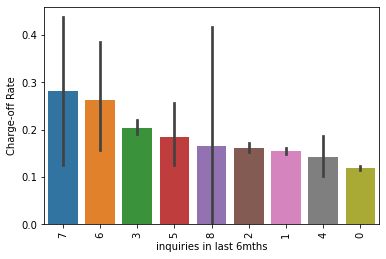

In [78]:
get_default_rate_plot('inq_last_6mths','inquiries in last 6mths',False)
observations['inq_last_6mths']='Charge-off rate varies randomly with no of enquiries done in the past 6 months.We see that even 8 enquiry counts have lesser default rate compared to 7 enquiry counts and 3 enquiry counts have higher default rate compare to 4 or 5 enquiry counts.'

<h5>Observation</h5>
<p>Charge-off rate varies randomly with no of enquiries done in the past 6 months.We see that even 8 enquiry counts have lesser default rate compared to 7 enquiry counts and 3 enquiry counts have higher default rate compare to 4 or 5 enquiry counts.</p>

<h5>14.for No of open credit lines</h5>


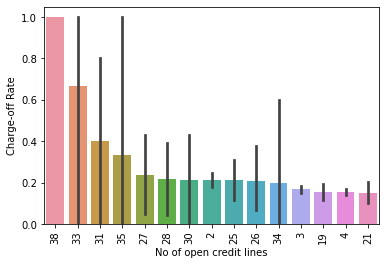

In [79]:
get_default_rate_plot('open_acc','No of open credit lines',False)
observations['open_acc']='Again we observe randomness in charge-off rate for number of credit lines count.Though 38 count has highest charge-off rate but again 34 count shows drastically low charge-off rate compared to 33 count.Also count 2 has higher charge-off rate compared to count 34.'

<h5>Observation</h5>
<p>Again we observe randomness in charge-off rate for number of credit lines count.Though 38 count has highest charge-off rate but again 34 count shows drastically low charge-off rate compared to 33 count.Also count 2 has higher charge-off rate compared to count 34.</p>

<h5>15.for No of derogatory public records</h5>


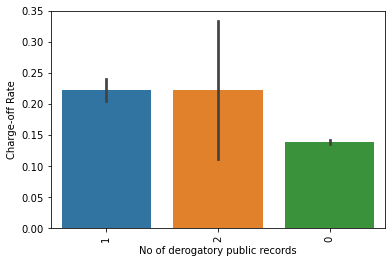

In [80]:
get_default_rate_plot('pub_rec','No of derogatory public records',False)
observations['pub_rec']='People having a derogatory record tend to have higher charge-off rates'

<h5>Observation</h5>
<p>People having a derogatory record tend to have higher charge-off rates</p>

<h5>16.For total credit revolving balance</h5>


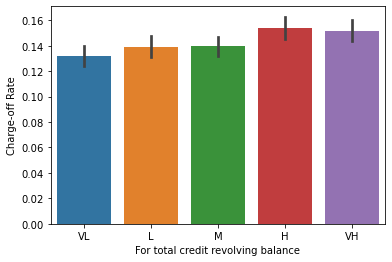

In [81]:
get_default_rate_plot('revol_bal','For total credit revolving balance',True)
observations['revol_bal']='credit revolving balance is the balance left unpaid at the end of the billing cycle.We observe higher the revolving balance ,higher is the default rate'

<h5>Observation</h5>
<p>credit revolving balance is the balance left unpaid at the end of the billing cycle.We observe higher the revolving balance ,higher is the default rate</p>

<h5>17.for total number of credit lines currently in the borrower's credit file</h5>


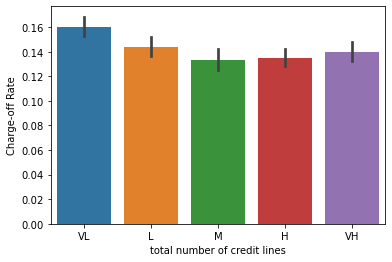

In [82]:
get_default_rate_plot('total_acc','total number of credit lines',True)
observations['total_acc']='We observe that people with lesser number of credit lines tend to have higher changes of deafault.'

<h5>Observation</h5>
<p>We observe that people with lesser number of credit lines tend to have higher changes of deafault.</p>

<h5>19.for total bankruptcies</h5>


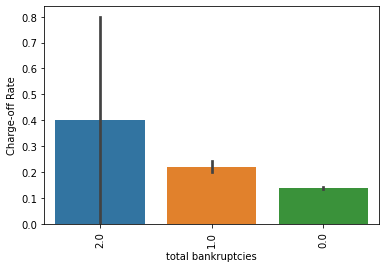

In [83]:
get_default_rate_plot('pub_rec_bankruptcies','total bankruptcies',False)
observations['pub_rec_bankruptcies']='Higher the number of bankrupcies higher is the default rate'

<h5>Observation</h5>
<p>Higher the number of bankrupcies higher is the default rate.</p>

<h5>20.for earliest credit line reported</h5>


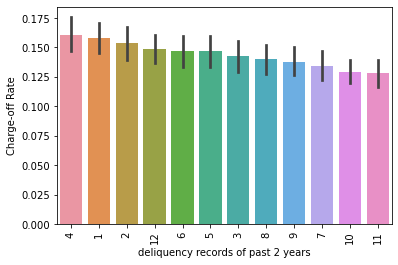

In [84]:
get_default_rate_plot('earliest_cr_line_month','deliquency records of past 2 years',False)
observations['earliest_cr_line_month']='Default rate varies randomly with months'

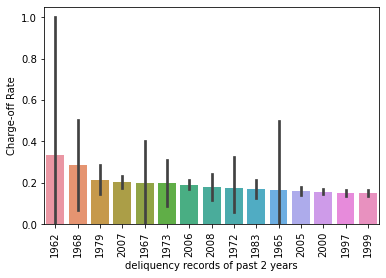

In [85]:
get_default_rate_plot('earliest_cr_line_year','deliquency records of past 2 years',False)
observations['earliest_cr_line_year']='Default rate varies randomly with year'

<h5>Observation</h5>
<p>We observe that charge off rate varies randomly with the parameter 'The month the borrower's earliest reported credit line was opened</p>

***completed Plot rate of charge-off against each variable***

# Univaritate Analysis part2: Visualize variable spread and Charge-off fraction for the variable.

In [86]:
def plot_var(col_name, full_name, continuous):
    """
    Visualize a variable with and without faceting on the loan status.
    - col_name is the variable name in the dataframe
    - full_name is the full variable name
    - continuous is True if the variable is continuous, False otherwise
    """
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,3))
    
    # Plot without loan status
    if continuous:
        #sns.distplot(loan["col_name"])
        sns.distplot(loan[col_name], ax=ax1)
    else:
        sns.countplot(loan[col_name], order=sorted(loan[col_name].unique()), ax=ax1)
        ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
        
    ax1.set_xlabel(full_name)
    ax1.set_ylabel('Count')
    ax1.set_title(full_name)
    

    # Plot with loan status
    if continuous:
        sns.boxplot(x=col_name, y='loan_status', data=loan, ax=ax2)
        ax2.set_ylabel('')
        ax2.set_title(full_name + ' by Loan Status')
    else:
        charge_off_rates = loan.groupby(col_name)['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']
        sns.barplot(x=charge_off_rates.index, y=charge_off_rates.values, ax=ax2)
        ax2.set_ylabel('Fraction of Loan Charged-off')
        ax2.set_title('Charge-off Rate by ' + full_name)
        ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
    ax2.set_xlabel(full_name)
    
        
    plt.tight_layout()

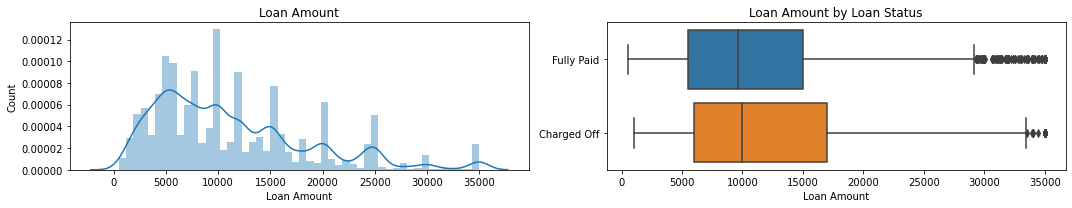

In [87]:
plot_var('loan_amnt', 'Loan Amount', continuous=True)

<h5>Observation</h5>
<p>There is not a large differnce in means but 75 percentile is higher in Charged Off compared to Fully paid</p>

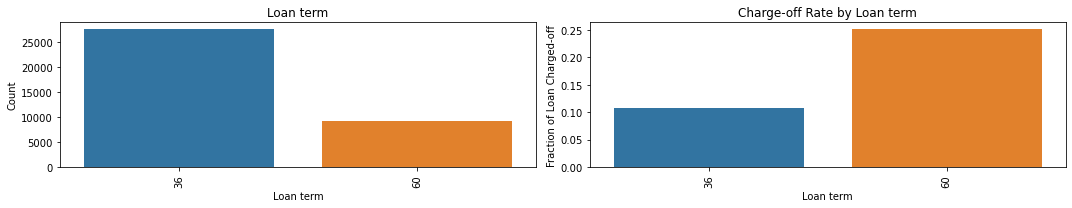

In [88]:
plot_var('term', 'Loan term', continuous=False)

<h5>Observation</h5>
<p>More applicants applied loan for 36 months term period compared for 60 Months in which fraction of loan charged off rate is higher in 60 months i.e Loan Term is directly proportional to Loan Charged Off</p>

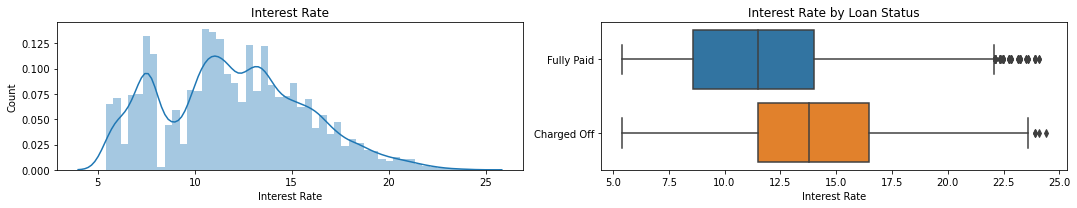

In [89]:
plot_var('int_rate', 'Interest Rate', continuous=True)

<h5>Observation</h5>
<p>Interest rate is directly proportional to Loan Charged Off</p>

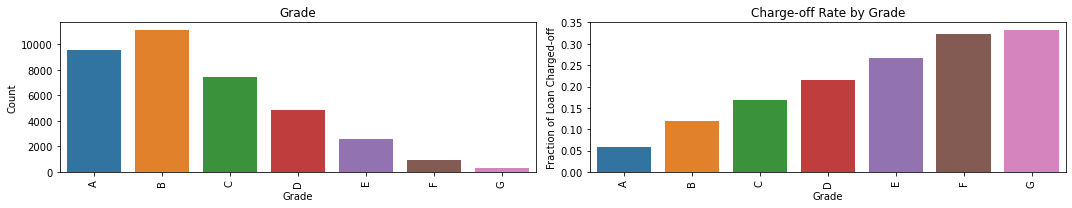

In [90]:
plot_var('grade', 'Grade', continuous=False)

<h5>Observation</h5>
<p>Grade is directly proportional to Loan Charged Off</p>

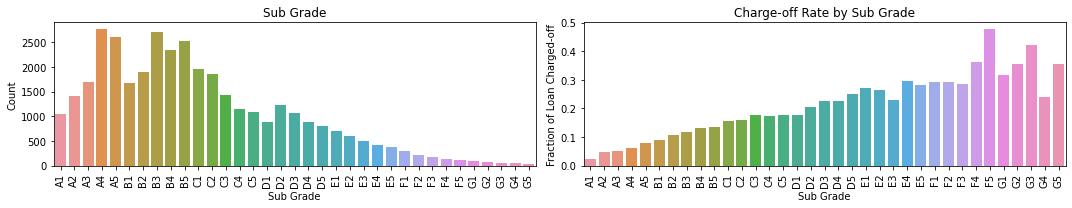

In [91]:
plot_var('sub_grade', 'Sub Grade', continuous=False)

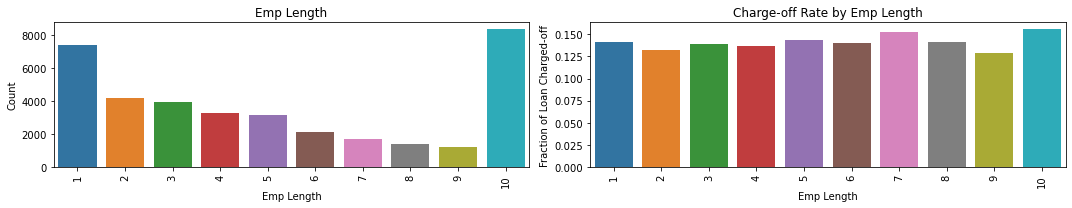

In [92]:
plot_var('emp_length', 'Emp Length', continuous=False)

<h5>Observation</h5>
<p>Empoyment Length does not vary with respect to Loan Status</p>

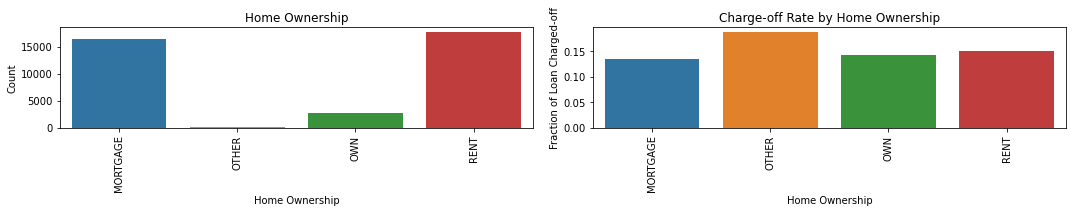

In [93]:
plot_var('home_ownership', 'Home Ownership', continuous=False)

<h5>Observation</h5>
<p>Applicants leaving in Rented Home is than Mortage Home</p>

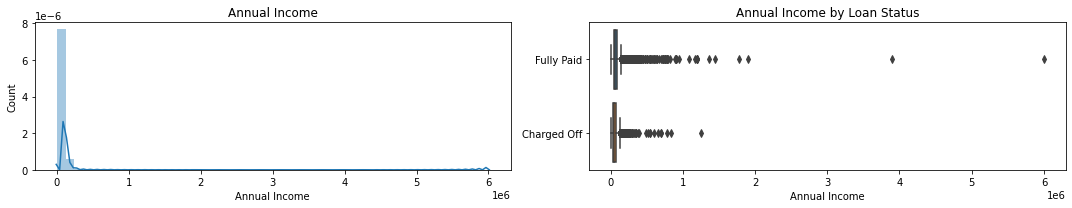

In [94]:
plot_var('annual_inc', 'Annual Income', continuous=True)

<h5>Observation</h5>
<p>Presence of outlier above range...we have to remove outliers for correct analysis of Annual Income w.r.t. Loan Status</p>

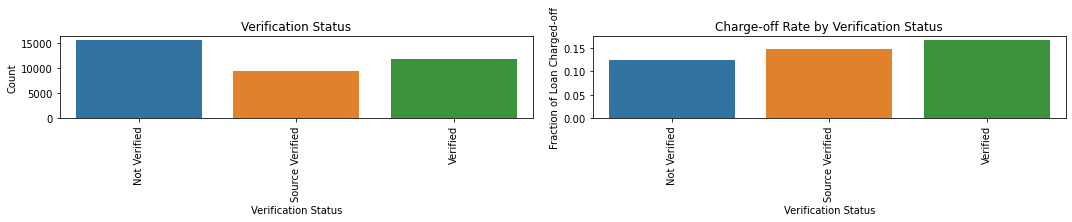

In [95]:
plot_var('verification_status', 'Verification Status', continuous=False)

<h5>Observation</h5>
<p>Higest probability of applicant to be charged off from the category Verified</p>

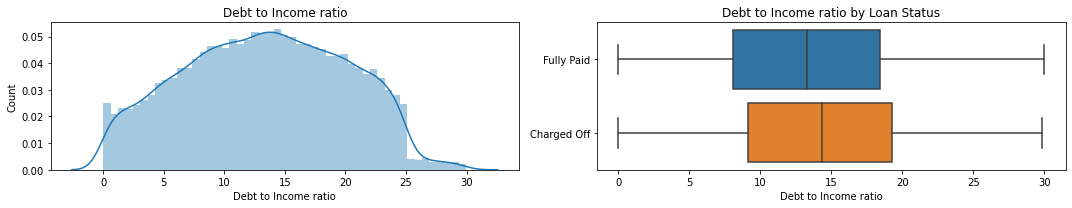

In [96]:
plot_var('dti', 'Debt to Income ratio', continuous=True)

<h5>Observation</h5>
<p>Slight variation in dti raion w.r.t. Loan Status</p>

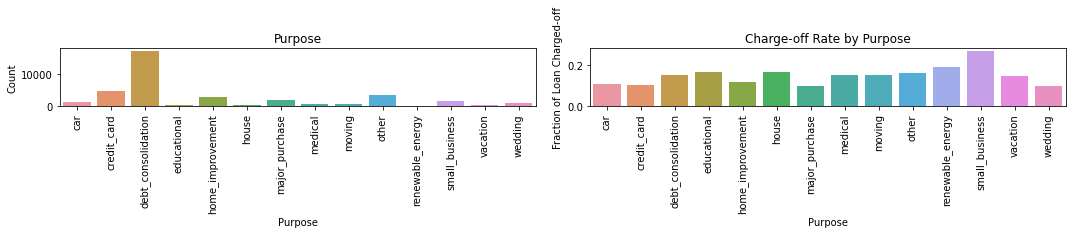

In [97]:
plot_var('purpose', 'Purpose', continuous=False)

<h5>Observation</h5>
<p>Applicants from "small buisness" category has the highest probability of Charged Off</p>

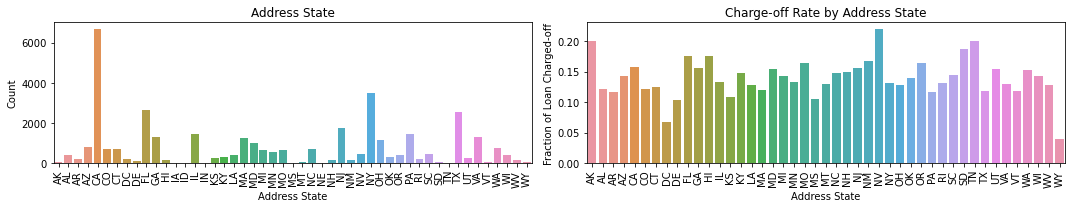

In [98]:
plot_var('addr_state', 'Address State', continuous=False)

<h5>Observation</h5>
<p>Applicants from states like "AK","NV","SD","TN" has highest probability of Charged Off</p>

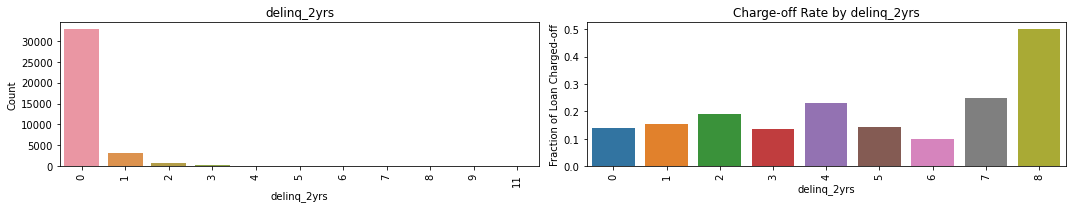

In [99]:
plot_var('delinq_2yrs', 'delinq_2yrs', continuous=False)

<h5>Observation</h5>
<p>Applicants from "delinq_2yrs 8" has the highest probability of Charged Off</p>

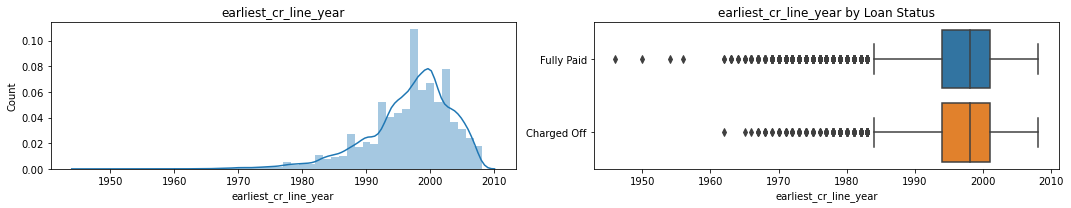

In [100]:
plot_var('earliest_cr_line_year', 'earliest_cr_line_year', continuous=True)

<h5>Observation</h5>
<p>There is a slight differnce in "earliest_cr_line_year" column w.r.t. Loan Status</p>

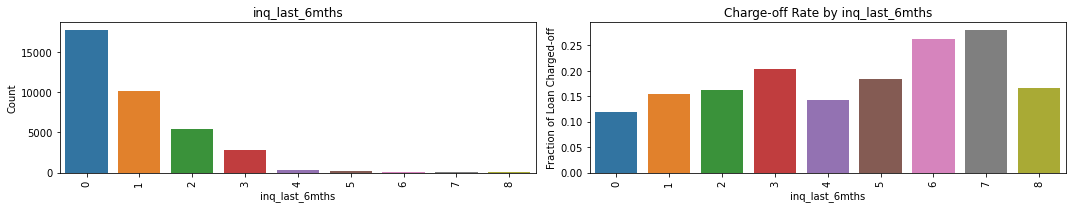

In [101]:
plot_var('inq_last_6mths', 'inq_last_6mths', continuous=False)

<h5>Observation</h5>
<p>Probability of inq_last_6mnts 7 has highest probability of Charged Off </p>

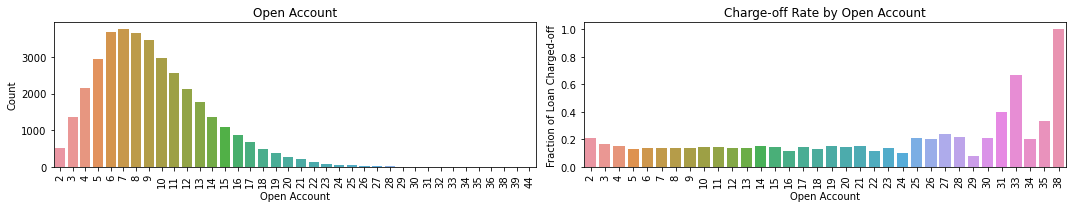

In [102]:
plot_var('open_acc', 'Open Account', continuous=False)

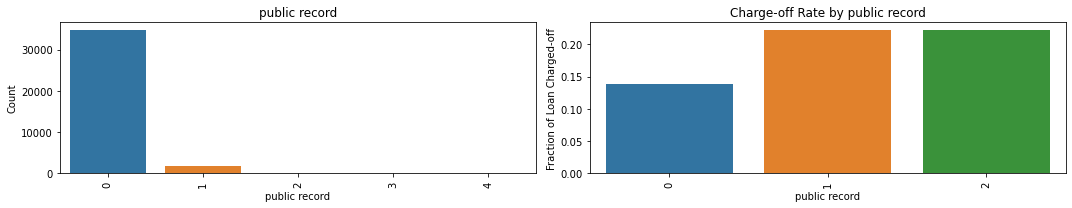

In [103]:
plot_var('pub_rec', 'public record', continuous=False)

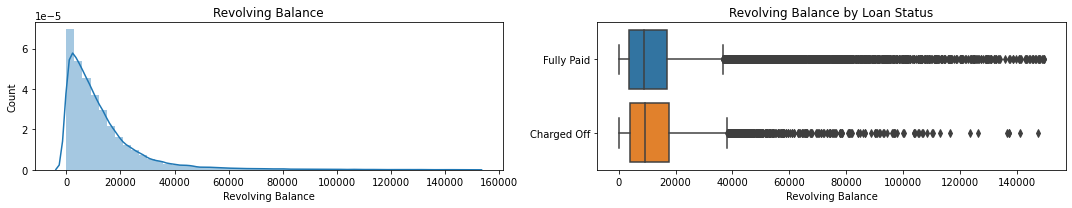

In [104]:
plot_var('revol_bal', 'Revolving Balance', continuous=True)

<h5>Observation</h5>
<p>Slight variation in Revolving Balance raion w.r.t. Loan Status</p>

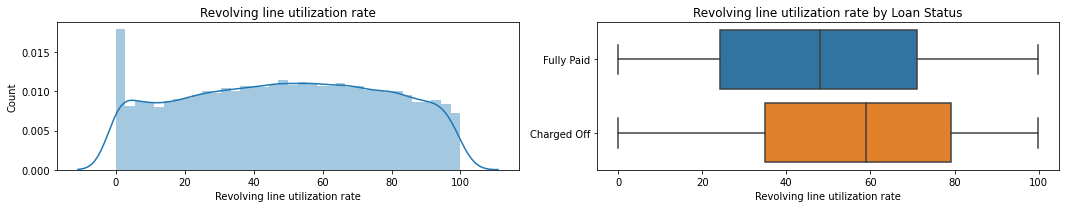

In [105]:
plot_var('revol_util', 'Revolving line utilization rate', continuous=True)

<h5>Observation</h5>
<p>Probabilty of Charged off is more in Revolving line utilization rate</p>

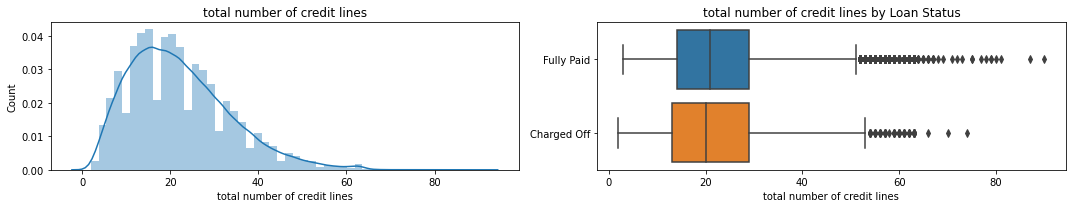

In [106]:
plot_var('total_acc', 'total number of credit lines', continuous=True)

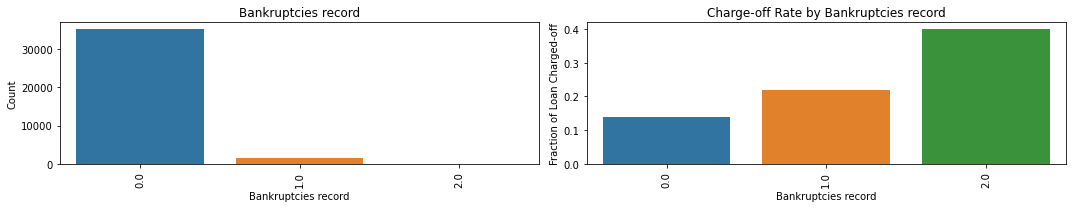

In [107]:
plot_var('pub_rec_bankruptcies', 'Bankruptcies record', continuous=False)

***completed Univariate Analysis part2 ***

# Bivariate/Multivariate Analysis

In [108]:
loan_correlation = loan.corr()
loan_correlation

,loan_amnt,term,int_rate,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,target_variable,earliest_cr_line_month,earliest_cr_line_year,issue_d_month,issue_d_year
loan_amnt,1.000000,0.347141,0.299814,0.148071,0.270172,0.060025,-0.034761,0.011216,0.174466,-0.047159,0.315970,0.060778,0.255641,-0.031905,0.061353,-0.013781,-0.194599,0.053286,0.115445
term,0.347141,1.000000,0.440857,0.102066,0.044105,0.075337,0.008228,0.049628,0.046074,0.011320,0.067182,0.064931,0.093444,0.017460,0.178645,-0.015830,-0.042459,0.028030,0.231763
int_rate,0.299814,0.440857,1.000000,-0.002588,0.047641,0.107563,0.158821,0.135633,0.008649,0.098928,0.096476,0.464907,-0.046081,0.083131,0.214344,-0.009998,0.114989,0.023139,0.026425
emp_length,0.148071,0.102066,-0.002588,1.000000,0.112117,0.047081,0.014538,0.010597,0.096696,0.064914,0.152904,0.009009,0.207914,0.063125,0.016337,-0.042628,-0.285575,0.021263,0.107867
annual_inc,0.270172,0.044105,0.047641,0.112117,1.000000,-0.123553,0.021222,0.034581,0.156305,-0.014411,0.276163,0.015545,0.236350,-0.012418,-0.039467,-0.011357,-0.194266,0.008989,0.014542
dti,0.060025,0.075337,0.107563,0.047081,-0.123553,1.000000,-0.034962,0.000675,0.290169,-0.005436,0.227999,0.276639,0.228279,0.006438,0.042687,0.009928,-0.041894,0.008258,0.080613
delinq_2yrs,-0.034761,0.008228,0.158821,0.014538,0.021222,-0.034962,1.000000,0.008404,0.011153,0.010929,-0.056344,-0.043988,0.067006,0.005801,0.017422,0.000275,-0.067424,-0.011652,0.004251
inq_last_6mths,0.011216,0.049628,0.135633,0.010597,0.034581,0.000675,0.008404,1.000000,0.094285,0.023190,-0.024636,-0.069610,0.115205,0.014244,0.069451,-0.009035,-0.011193,0.016301,-0.058662
open_acc,0.174466,0.046074,0.008649,0.096696,0.156305,0.290169,0.011153,0.094285,1.000000,0.003371,0.285846,-0.088064,0.685489,0.009136,-0.005672,0.003672,-0.228838,0.001398,0.014936
pub_rec,-0.047159,0.011320,0.098928,0.064914,-0.014411,-0.005436,0.010929,0.023190,0.003371,1.000000,-0.059147,0.057465,-0.019945,0.841753,0.050293,-0.010370,-0.052333,-0.023992,-0.016146


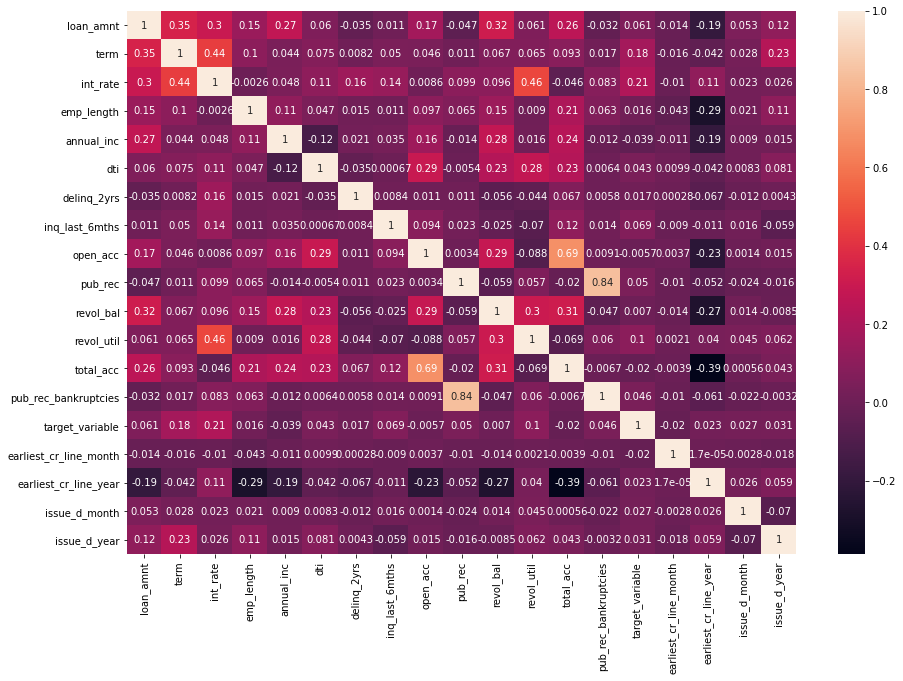

In [109]:
plt.figure(figsize=(15,10))
sns.heatmap(loan_correlation, xticklabels=loan_correlation.columns.values, yticklabels=loan_correlation.columns.values,annot= True)
plt.show()

<h5>Observation</h5>
<h4>Target Variable(chargeoff rate) has positive correlation with following variables:-</h4>
    <p>loan amount,term,interest rate,employment length,dti,delinquency records,inquiries in last 6 months,pub derogatory records,revoling bal,
    credit utilisation rate,public bankruptcy records</p>
    
<h4>Target Variable(chargeoff rate) has negative correlation with following variables:-</h4>
    <p>annual income,total accounts,open acc,earliest_cr_line_month</p>

In [110]:
#Analysing term vs purpose for target_variable

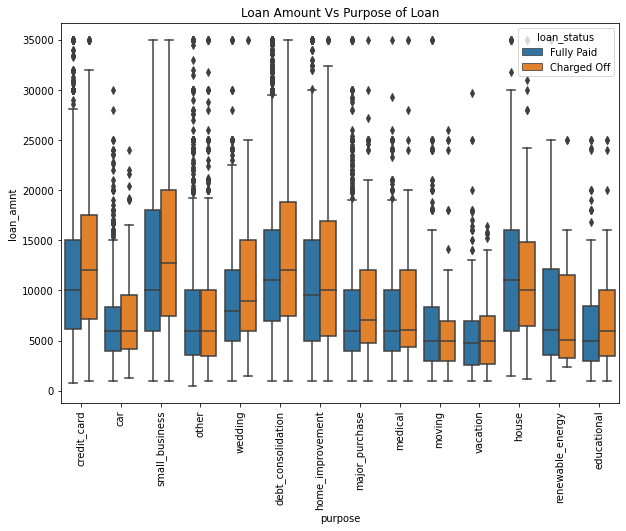

In [122]:
plt.figure(figsize=[10,7])
sns.boxplot(x='purpose', y='loan_amnt', hue ='loan_status',data=loan)
plt.title('Loan Amount Vs Purpose of Loan')
plt.xticks(rotation=90)
plt.show()

<h5>Observations</h5>
<p>Charge-off rate is highest among people taking loans for small_business.People tend to take higher loan amount in case of 
charge off compared to those who pay fully,except in case of house and renewable energy.</p>

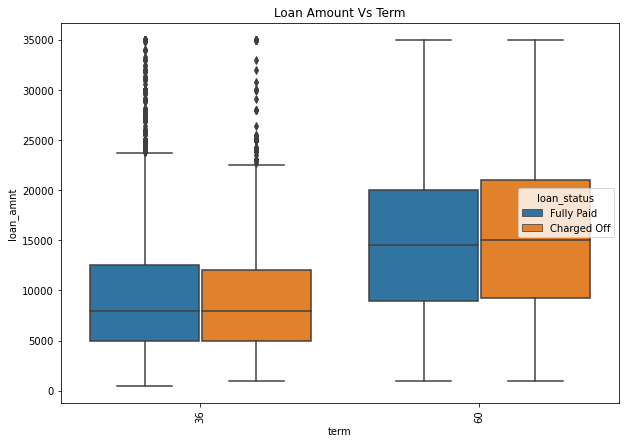

In [123]:
plt.figure(figsize=[10,7])
sns.boxplot(x='term', y='loan_amnt', hue ='loan_status',data=loan)
plt.title('Loan Amount Vs Term')
plt.xticks(rotation=90)
plt.show()

<h5>Observations</h5>
<p>Insignificat different in loan amount for charge-off and fully paid types</p>

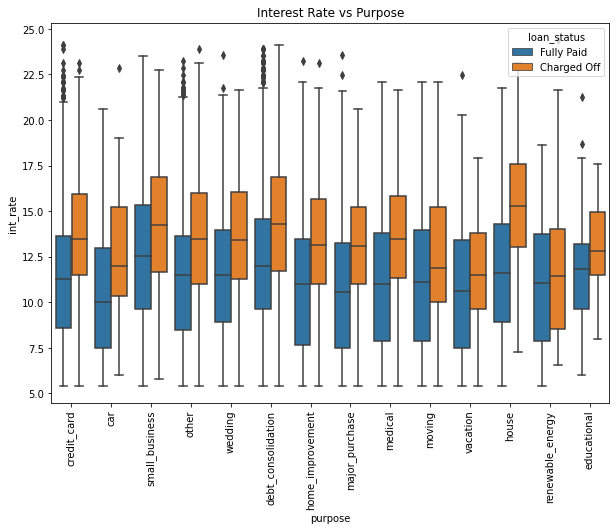

In [124]:
plt.figure(figsize=[10,7])
sns.boxplot(x='purpose', y='int_rate', hue ='loan_status',data=loan)
plt.title('Interest Rate vs Purpose')
plt.xticks(rotation=90)
plt.show()

<h5>Observations</h5>
<p>Charge-off rate is highest among people taking house loans.Interest rate is directly proportional to charge off rate.</p>

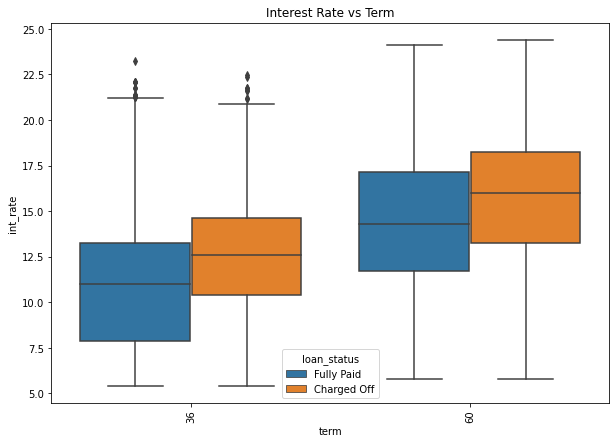

In [114]:
plt.figure(figsize=[10,7])
sns.boxplot(x='term', y='int_rate', hue ='loan_status',data=loan)
plt.title('Interest Rate vs Term')
plt.xticks(rotation=90)
plt.show()

<h5>Observations</h5>
<p>We observe that for the same term,those with higher interest rate tend to perform charge off</p>

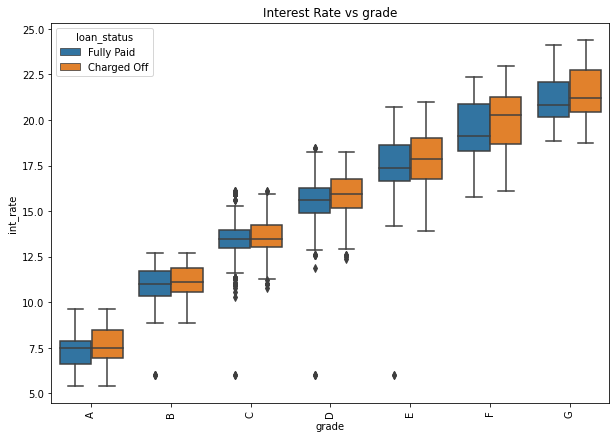

In [125]:
plt.figure(figsize=[10,7])
sns.boxplot(x='grade', y='int_rate', hue ='loan_status',data=loan,order=sorted(loan['grade'].unique()))
plt.title('Interest Rate vs grade')
plt.xticks(rotation=90)
plt.show()

<h5>Observations</h5>
<p>Charge off rate and interest rate is inversely proportional to Grade.</p>

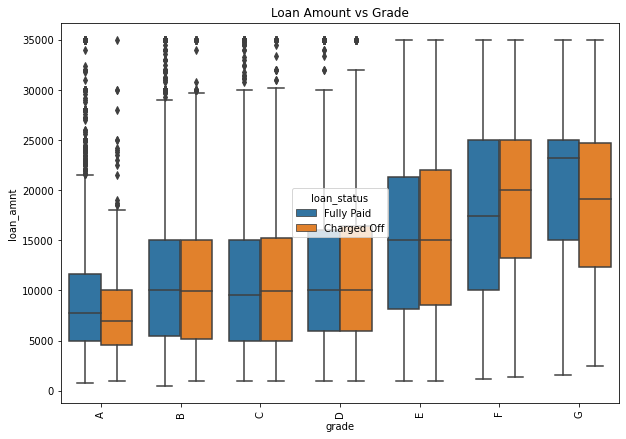

In [126]:
plt.figure(figsize=[10,7])
sns.boxplot(x='grade', y='loan_amnt', hue ='loan_status',data=loan,order=sorted(loan['grade'].unique()))
plt.title('Loan Amount vs Grade')
plt.xticks(rotation=90)
plt.show()

<h5>Observations</h5>
<p>Grades like D,E,F,G where there is high risk of default tend to have loan amount equal/higher for the charged off group.  </p>

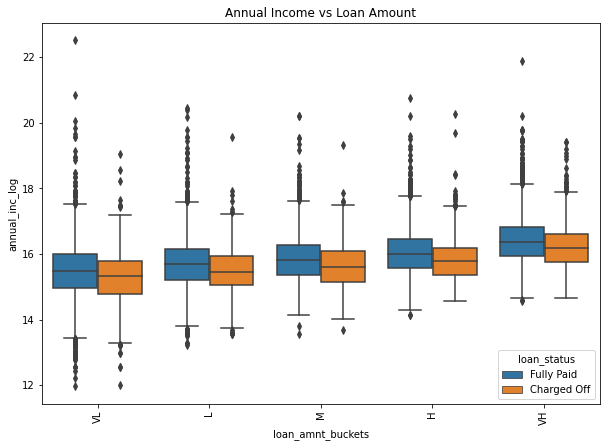

In [128]:
loan['annual_inc_log']=np.log2(loan['annual_inc'])
plt.figure(figsize=[10,7])
sns.boxplot(x='loan_amnt_buckets', y='annual_inc_log', hue ='loan_status',data=loan)
plt.title('Annual Income vs Loan Amount')
plt.xticks(rotation=90)
plt.show()

<h5>Observations</h5>
<p>Annual income is directly proportional to loan amount and inversely proportional to charge-off rate.</p>

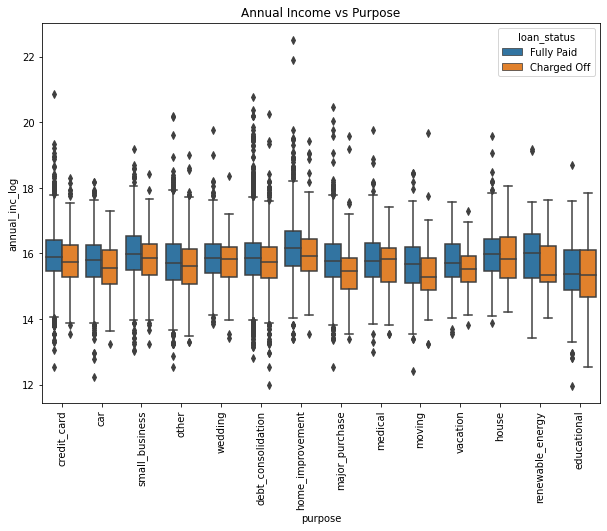

In [129]:
plt.figure(figsize=[10,7])
sns.boxplot(x='purpose', y='annual_inc_log', hue ='loan_status',data=loan)
plt.title('Annual Income vs Purpose')
plt.xticks(rotation=90)
plt.show()

In [148]:
#finding information value of each variable
def calculate_woe_iv(dataset, feature, target):
    lst = []
    for i in range(dataset[feature].nunique()):
        val = list(dataset[feature].unique())[i]
        lst.append({
            'Value': val,
            'All': dataset[dataset[feature] == val].count()[feature],
            'Good': dataset[(dataset[feature] == val) & (dataset[target] == 0)].count()[feature],
            'Bad': dataset[(dataset[feature] == val) & (dataset[target] == 1)].count()[feature]
        })
       
    dset = pd.DataFrame(lst)
    dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
    dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()
    dset['WoE'] = np.log((dset['Distr_Good']+1) / (dset['Distr_Bad']+1))
    dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
    iv = dset['IV'].sum()
   
    dset = dset.sort_values(by='WoE')
   
    return dset, iv
significant_var = []
num_trans_col =[]
for col in num_trans_col:
    if col == event_col[0]: continue
    else:
        print('WoE and IV for column: {}'.format(col))
        con02_num['bined_col'] = pd.qcut(con02_num[col], q=10, precision=0)
        print(con02_num['bined_col'].unique())
        df, iv = calculate_woe_iv(con02_num, 'bined_col', event_col[0])
        #print(df)
        print('IV score: {:.2f}'.format(iv))
        #print('\n')
       
        if iv>0.04:
            significant_var.append(col)
#print(significant_var)

In [149]:
# we observed that no of loan applications for term=60 are very less 
#in comparision with no of loan applications for term=36,therefor the percentage of default is higher for term=60
#to solve this we can use information value of variable
'''Information Value	Predictive Power
< 0.02	useless for prediction
0.02 to 0.1	Weak predictor
0.1 to 0.3	Medium predictor
0.3 to 0.5	Strong predictor
 >0.5	Suspicious or too good to be true
'''
#reference:http://ucanalytics.com/blogs/information-value-and-weight-of-evidencebanking-case/
calculate_woe_iv(loan,'term','target_variable')

(   Value    All   Good   Bad  Distr_Good  Distr_Bad       WoE        IV
 1     60   9254   6931  2323    0.219795   0.441132 -0.166746  0.036907
 0     36  27546  24603  2943    0.780205   0.558868  0.132769  0.029387,
 0.0662938605632529)

<h5>Observations</h5>
<p>We observe that irrespective of purpose(except in case of education loan) annual income of those who charge off is lower that those who pay their loan fully.</p>

In [119]:
obs = pd.DataFrame()
obs['col'] =observations.keys()

In [120]:
obs['observations']=observations.values()

### Univariate Analysis observations

In [121]:
obs

,col,observations
0,loan_amnt,"Charge-off rate is highest for very high loan amount and there is gradual increase in charge-off rate from low,medium,high and very high loan amount"
1,term,Charge-off rate is double in case of loans with higher term period of 60 months in comparison with 36 months.
2,int_rate,Charge-off rate increases as the rate of interest increases.People with very high interest rate default more.
3,grade,Charge-off rate increases as grade degrades towards a lower value.
4,emp_length,Charge-off rate is in the range of 13%-15% for different employment groups.The variation in charge-off rate is very insignificant.
5,home_ownership,"Peope with home-ownenship of type mortagage,own,rent have similar default rate."
6,annual_inc,Charge-off rate is highest is highest among very low income people and gradually decreases with increase in income.
7,verification_status,People with income verified by LC suprisingly tend to default the most.
8,purpose,"Charge-off rate is high amoung people taking loans for small_business,renewable_energy,house,education"
9,addr_state,"States live 'Nevada','Alaska','Tennessee','South Dakota' have higher default rates.but the variation in default rate among states is insignificat."


<h4>From our observation we conclude that,Loan Status is a Target Variable.</h4>

<h6>Below is a list of Top 7 variables responsible to predict the Loan Status :</h6>
 <p>Interest rate</p>
 <p>Annual Income</p>
 <p>Grade</p>
 <p>Purpose of loan</p>
 <p>Term</p>
 <p>Debt to Income Ratio</p>
 <p>Revolving line utilization rate</p>
